In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

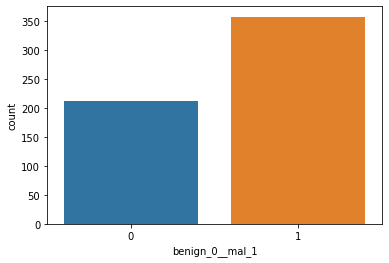

In [5]:
sns.countplot(x = 'benign_0__mal_1', data = df)

<AxesSubplot:>

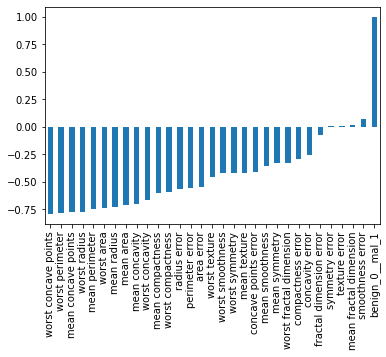

In [6]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar')

<AxesSubplot:>

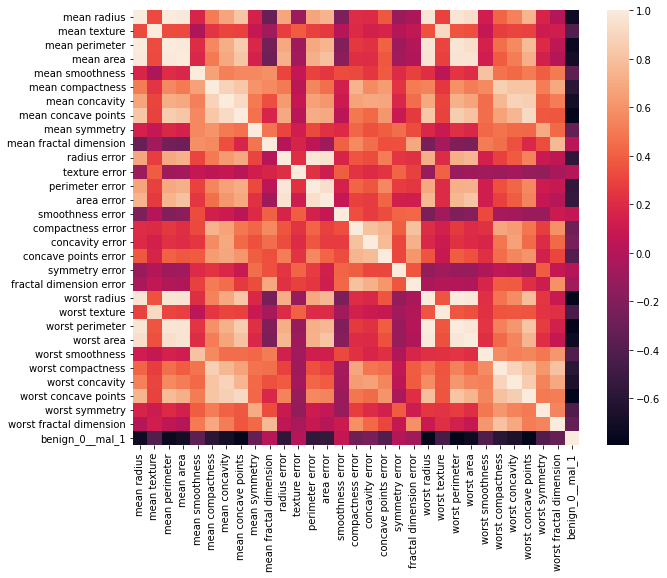

In [7]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr())

In [8]:
X = df.drop('benign_0__mal_1', axis = 1).values
Y = df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))

# Binary Classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [17]:
%%time
model.fit(x = X_train, y = Y_train, epochs = 600, validation_data = (X_test, Y_test))

Epoch 1/600
14/14 [==============================] - 2s 12ms/step - loss: 0.6935 - val_loss: 0.6766
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6601 - val_loss: 0.6433
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6240 - val_loss: 0.6022
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5737 - val_loss: 0.5426
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5107 - val_loss: 0.4707
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4406 - val_loss: 0.3948
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3756 - val_loss: 0.3324
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3216 - val_loss: 0.2839
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2835 - val_loss: 0.2461
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2532 - val_loss: 0.2190
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0371 - val_loss: 0.0838
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0367 - val_loss: 0.0888
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0352 - val_loss: 0.0852
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0346 - val_loss: 0.0869
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0350 - val_loss: 0.0854
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0381 - val_loss: 0.0859
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0336 - val_loss: 0.0890
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0334 - val_loss: 0.0879
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0328 - val_loss: 0.0940
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0331 - val_loss: 0.0901
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0213 - val_loss: 0.1489
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0184 - val_loss: 0.1529
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0193 - val_loss: 0.1492
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.1630
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0226 - val_loss: 0.1498
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0209 - val_loss: 0.1580
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0192 - val_loss: 0.1620
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0187 - val_loss: 0.1530
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0178 - val_loss: 0.1580
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0169 - val_loss: 0.1641
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0108 - val_loss: 0.2103
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.2158
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.2175
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.2200
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.2180
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.2182
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0088 - val_loss: 0.2205
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.2224
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.2241
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.2282
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.2704
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.2806
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.2745
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.2750
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.2742
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.2785
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.2777
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.2763
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.2824
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.2782
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.3121
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.3119
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.3124
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.3140
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.3152
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.3128
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.3160
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.3140
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.3162
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.3160
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.3572
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.3578
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 9.6742e-04 - val_loss: 0.3565
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 9.8470e-04 - val_loss: 0.3612
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.3599
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.3601
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 9.9283e-04 - val_loss: 0.3605
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.3600
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.3622
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss:

Epoch 567/600
14/14 [==============================] - 0s 3ms/step - loss: 6.5511e-04 - val_loss: 0.3946
Epoch 568/600
14/14 [==============================] - 0s 3ms/step - loss: 5.0647e-04 - val_loss: 0.3989
Epoch 569/600
14/14 [==============================] - 0s 3ms/step - loss: 4.8787e-04 - val_loss: 0.3987
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 5.0251e-04 - val_loss: 0.3991
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 4.5788e-04 - val_loss: 0.3987
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 5.6726e-04 - val_loss: 0.3975
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 7.6804e-04 - val_loss: 0.4047
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 8.3433e-04 - val_loss: 0.3962
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 9.0220e-04 - val_loss: 0.4142
Epoch 576/600
14/14 [==============================] - 

In [18]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

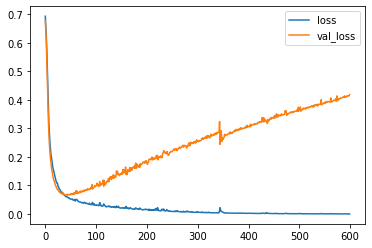

In [19]:
losses.plot()

In [20]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))

# Binary Classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [22]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [23]:
%%time
model.fit(x = X_train, y = Y_train, epochs = 600, validation_data = (X_test, Y_test), callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6791 - val_loss: 0.6557
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6426 - val_loss: 0.6166
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5988 - val_loss: 0.5709
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5540 - val_loss: 0.5228
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5024 - val_loss: 0.4696
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4498 - val_loss: 0.4167
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3985 - val_loss: 0.3650
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3521 - val_loss: 0.3204
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3141 - val_loss: 0.2845
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2836 - val_loss: 0.2550
Epoch 11/

In [24]:
# print(log_directory)

NameError: name 'log_directory' is not defined

In [ ]:
pwd

In [25]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

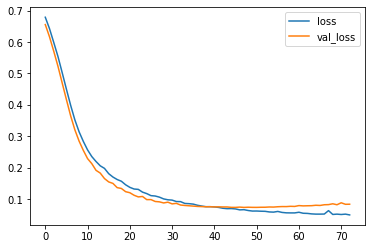

In [26]:
model_loss.plot()

In [27]:
from tensorflow.keras.layers import Dropout

In [28]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))

# Binary Classification
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [29]:
log_directory = 'logs\\fit'

board = TensorBoard(log_dir = log_directory, histogram_freq = 1, write_graph = True, write_images = True,
                   update_freq = 'epoch', profile_batch = 2, embeddings_freq = 1)

In [30]:
%%time
model.fit(x = X_train, y = Y_train, epochs = 600, validation_data = (X_test, Y_test), callbacks = [early_stop, board])

Epoch 1/600
14/14 [==============================] - 1s 21ms/step - loss: 0.6983 - val_loss: 0.6784
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6750 - val_loss: 0.6567
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6547 - val_loss: 0.6354
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6251 - val_loss: 0.6132
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6115 - val_loss: 0.5897
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5916 - val_loss: 0.5628
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5604 - val_loss: 0.5305
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5339 - val_loss: 0.4955
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5197 - val_loss: 0.4607
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4962 - val_loss: 0.4283
Epoch 11

14/14 [==============================] - 0s 7ms/step - loss: 0.0778 - val_loss: 0.0885
Epoch 84/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0820 - val_loss: 0.0888
Epoch 85/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0793 - val_loss: 0.0883
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0933 - val_loss: 0.0887
Epoch 87/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0785 - val_loss: 0.0883
Epoch 88/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0726 - val_loss: 0.0897
Epoch 89/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0651 - val_loss: 0.0917
Epoch 90/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0881 - val_loss: 0.0908
Epoch 91/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0816 - val_loss: 0.0904
Epoch 92/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0831 - val_loss: 0.0928
Epoch 92: ear

In [31]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

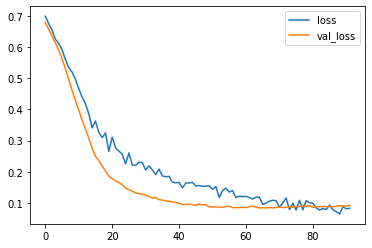

In [32]:
model_loss.plot()

In [33]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.98      0.99      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [36]:
print(confusion_matrix(Y_test, predictions))

[[52  2]
 [ 1 88]]
